In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/50], Step [100/391], Loss: 4.3751
Epoch [1/50], Step [200/391], Loss: 3.9605
Epoch [1/50], Step [300/391], Loss: 3.7440
Test Accuracy of the model on the 10000 test images: 15.32%
Epoch [2/50], Step [100/391], Loss: 3.4153
Epoch [2/50], Step [200/391], Loss: 3.7910
Epoch [2/50], Step [300/391], Loss: 3.3746
Test Accuracy of the model on the 10000 test images: 21.41%
Epoch [3/50], Step [100/391], Loss: 3.2011
Epoch [3/50], Step [200/391], Loss: 3.2187
Epoch [3/50], Step [300/391], Loss: 2.9877
Test Accuracy of the model on the 10000 test images: 23.62%
Epoch [4/50], Step [100/391], Loss: 3.1230
Epoch [4/50], Step [200/391], Loss: 2.9295
Epoch [4/50], Step [300/391], Loss: 2.7906
Test Accuracy of the model on the 10000 test images: 26.86%
Epoch [5/50], Step [100/391], Loss: 2.8421
Epoch [5/50], Step [200/391], Loss: 2.5263
Epoch [5/50], Step [300/391], Loss: 2.6229
Test Accuracy of the model on the 10000 test images: 29.15%
Epoch [6/50], Step [100/391], Loss: 2.7038
Epoch [6/50]

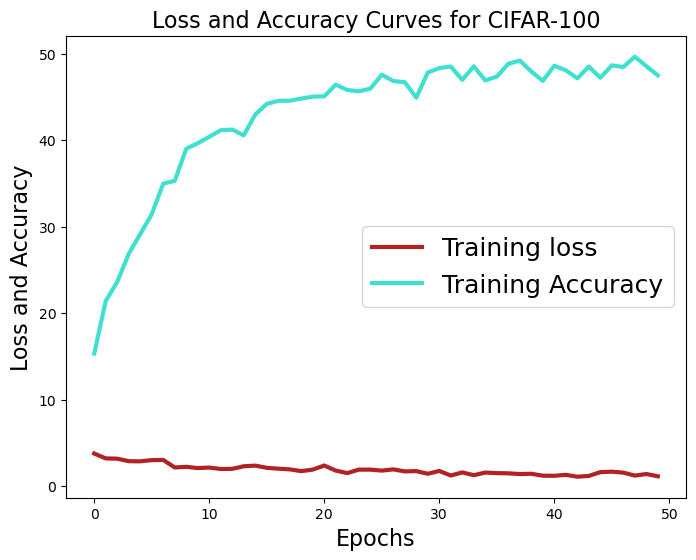

In [1]:
#importing library
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Declaring hyperparameters
epoch_no = 20 ; no_classes = 100
batch_size = 128 ; learning_rate = 0.1

# Define transformations for training and testing datasets
transform_train = transforms.Compose([transforms.RandomCrop(32, padding=4),transforms.RandomHorizontalFlip(),transforms.ToTensor(),transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762))])
transform_test = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5071, 0.4865, 0.4409), (0.2673, 0.2564, 0.2762))])

# Loading CIFAR-100 dataset
cifer_train = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform_train)
cifer_test = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform_test)

# Defining data loaders for training and testing datasets
cifer_loader_train = torch.utils.data.DataLoader(dataset=cifer_train, batch_size=batch_size, shuffle=True)
cifer_loader_test = torch.utils.data.DataLoader(dataset=cifer_test, batch_size=batch_size, shuffle=False)

# Defining DenseNet-121 model and loss function and optimizer
model = torchvision.models.densenet121(pretrained=False, no_classes=no_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=1e-4)

# Training the model
total_step = len(cifer_loader_train)
for epoch in range(epoch_no):
    for i, (images, labels) in enumerate(cifer_loader_train):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, epoch_no, i+1, total_step, loss.item()))
    # Testing the model
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in cifer_loader_test:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        accuracy = 100 * correct / total
        print('Test Accuracy of the model on the {} test images: {:.2f}%'.format(total, accuracy))

